In [0]:
from fastai.vision import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
os.chdir('drive/My Drive/Colab Notebooks/Fast_ai')
cwd=os.getcwd()
print(cwd)

/content/drive/My Drive/Colab Notebooks/Fast_ai


In [0]:
folder = 'cat'
file = 'cats.txt'

In [0]:
path = Path('dog_vs_cat/cat')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'dog'
file = 'dogs.txt'

In [0]:
path = Path('dog_vs_cat/dog')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['dog','cat']

In [12]:
download_images(path/file, dest, max_pics=200)

Error https://www.chewy.com/petcentral/wp-content/uploads/2018/05/can-dogs-eat-cucumbers-main.jpg HTTPSConnectionPool(host='www.chewy.com', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/resizer/x3ePm4rWgJy2bM48jKOrINwrmXU=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/QLXPTAVVGYI6RLSPFQKDTSLNPE.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)


In [16]:
download_images(path/file, dest, max_pics=200)

In [0]:
path=Path('dog_vs_cat')

In [24]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dog


/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:96: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


cat


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

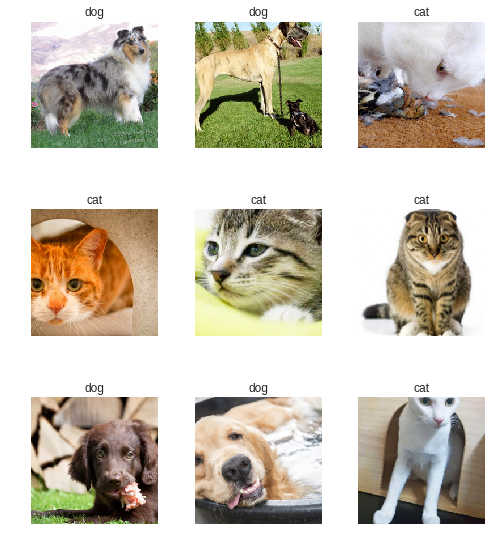

In [27]:
data.show_batch(rows=3, figsize=(7,8))

In [28]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 70850448.14it/s]


In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.820842,0.266629,0.105263
2,0.473743,0.164640,0.078947
3,0.352892,0.070803,0.026316
4,0.269402,0.053108,0.026316


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

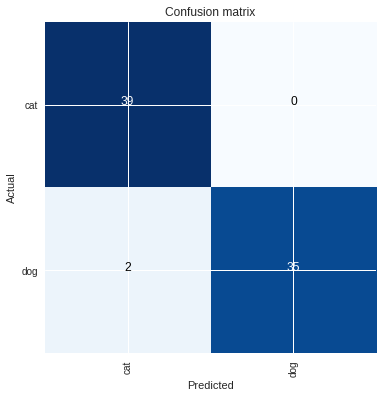

In [35]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

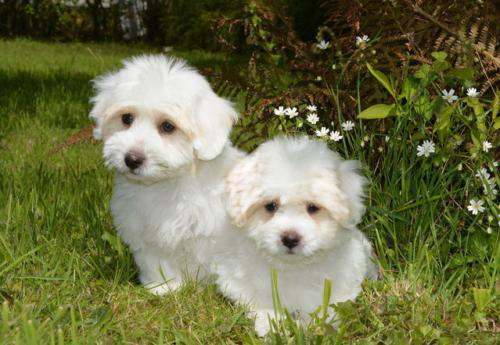

In [39]:
img = open_image(path/'dog/dog'/'00000021.jpg')
img

In [0]:
learn = load_learner(path)

In [41]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category dog